# DATA ANALYSIS

*  Data analysis is a process of inspecting, cleaning, transforming and discovering useful information
*  In ather words we can see that dat analysis is used to get insights by summarizing the past data
*  It is simplest and most common technique used in bussiness process 
*  It allow us to make accurate decisions and to stop guessing

## IMPORTING LIBRARIES

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## IMPORT DATASET

In [144]:
df=pd.read_csv(r"/kaggle/input/hr-analytics-prediction/HR-Employee-Attrition.csv")
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# INTRODUCTION OF PROJECT

* TARGET COLUMN == ATTRITION

* ATTRITION ---> Attrition is the departure of employee from the organization for any reason in or in simple words we can say that employees who want to leave the company

  1. ATTRITION "YES" ----> Employee wants to leave the company


  2. ATTRITION ---> Employee don’t want to leave

* WHAT WE ARE GOING TO DO IN THIS

* It will uncover the factors that lead to employee "attrition"

*  In this project we are going to analyse that how other features of dataset is effecting "Attrition"

# DOMAIN ANALYSIS

#### 1- AGE
Age of an Employee

#### 2- BUSSINESS TRAVEL 
That Employee is traveling or not for bussiness prupose

#### 3- DEPARTMENT
In which Department of company Employee is working

#### 4- DISTANCE FORM HOME
That how much distance is there of an employee from his/her house to office

#### 5- HOURLY/DAILY/MONTHLY RATING
  Rating given to employee on daily, hourly and monthly basis

#### 6- EDUCATON FIELD
From which education background Employee belongs to

#### 7- JOB AND ENVIRONMENT SATISFACTION
It is that employee is satisied with thier job as well as environment of office (Given in 1-5 rating)

#### 8- JOB INVOLVEMENT
How much employee is involved in his work (Given in rating 1-5)

#### 9- JOB LEVEL
Level of job (Given in 1-5 rating). Higher rating == higher job level

#### 10- PERFORMANCE RATING
How employee is performing according to his job (Given 1-5 rating)

#### 11- MONTHLY INCOME
Monthly Salaryof an employee in dollars

#### 12- PERCENTAGE SALARY HIKE
How much percent salary in increasing anaualy

### BASIC CHECKS

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

*  Here information tells us that there is no null values are present in data, so we need not to handle null values

*  However it can be seen that there are 9 features or columns which are of "object" data type. so we have to handle catagorical columns for our model creation

In [146]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


*  Here two column (Employ_count,  Standard_Hours) have std==0 , it means they have unique values it means they are not able to use inanalysis

In [147]:
df.describe(include="O")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


*  Here IN OVER18 COLUMN WE ONLY HAVE 1 UNIQUE VALUE SO IT MEANS NO ANALYSIS DONE ON IT

## EDA( EXPLORATORY DATA ANALYSIS)

 ### ANALYSIS ON CATAGORICAL COLUMNS W.R.T TARGET COLUMN(ATTRITION)

#### TARGET COLUMN == ATTRITION

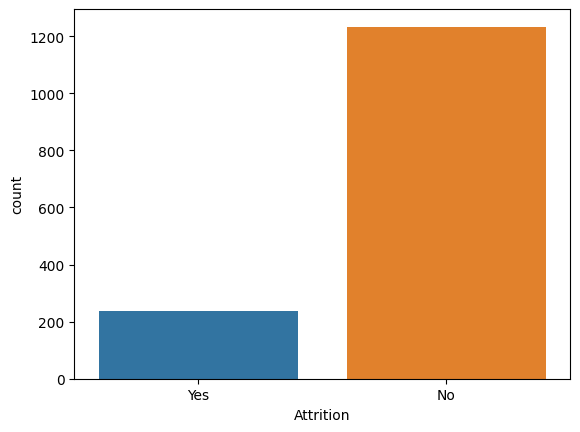

In [148]:
sns.countplot(x=df.Attrition)
plt.show()

*  Data of Attrition says that it has more number of "NO" values and less number of "YES"

*  It can be see that these is big difference in counts of the values so we can say that is IMBALANCE DATA

#### 1- IMPACT OF BUSINESS TRAVEL ON ATTRITION

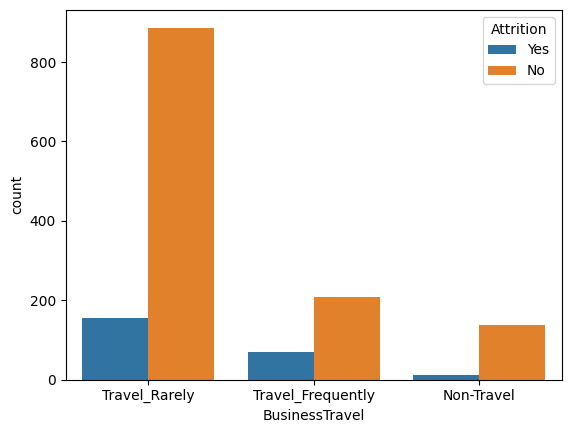

In [149]:
sns.countplot(hue=df.Attrition, x=df.BusinessTravel)
plt.show()

#### 2- IMPACT OF DEPARTMENT ON ATTRITION

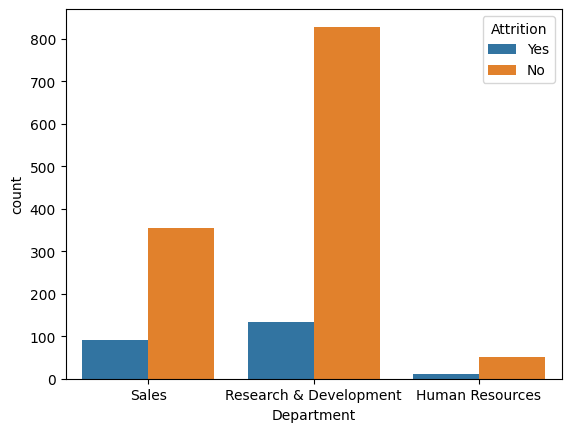

In [150]:
sns.countplot(hue=df.Attrition, x=df.Department)
plt.show()

*  There are 3 no.of department are there --> 1.Sales , 2.Research and Development , 3. HR department

*  "Research and Development" department have more number of Attrition(150 employees) as compared to other two department

*  "HR Department" have least Attrition with just 5 to 10 employees

#### 3- IMPACT OF EDUCATION FIELD ON ATTRITION

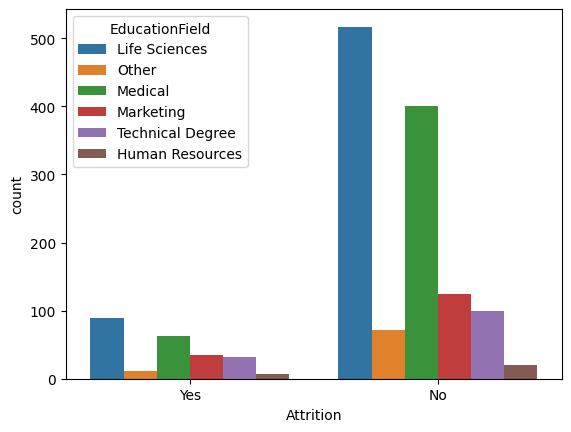

In [151]:
sns.countplot(x=df.Attrition, hue=df.EducationField)
plt.show()

*  Frist and foremost thing is that employees who are from "Life Science" and "Medical" backgrounds are more as compared to other education fields

*  Nearly 100 number of employees are there who are from Life Science education background will leave the company and followed by Medical education employees

* As we conclude from analysis of department and Attrition. here also HR educational background employees have least Attrition

#### 4- GENDER AND ATTRITION

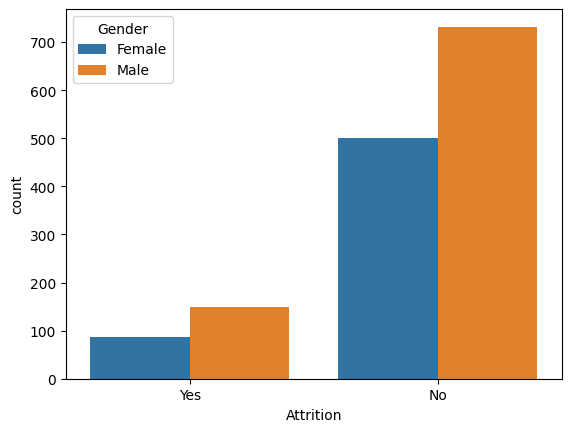

In [152]:
sns.countplot(x=df.Attrition, hue=df.Gender)
plt.show()

*  Male employees are more as comared to Females

*  Males are more likely to quit the job rather than Females

#### OVERTIME AND ATTRITION

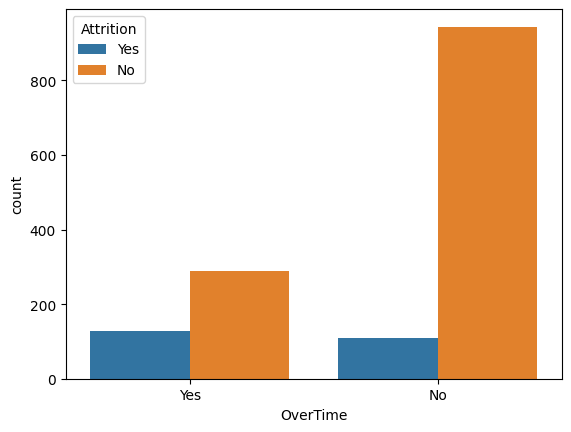

In [153]:
sns.countplot(hue=df.Attrition , x=df.OverTime)
plt.show()

*  As for "Attrition yes". there is minor difference between the employees who are doing overtime and who are not doing overtime

*  So we can say that Overtime feature is not much effecting Attrition

* But we can conclude that most of employees are not doing overtime

#### 6- IMPACT OF JOB ROLE ON ATTRITION

Text(0.5, 0, 'JobRole')

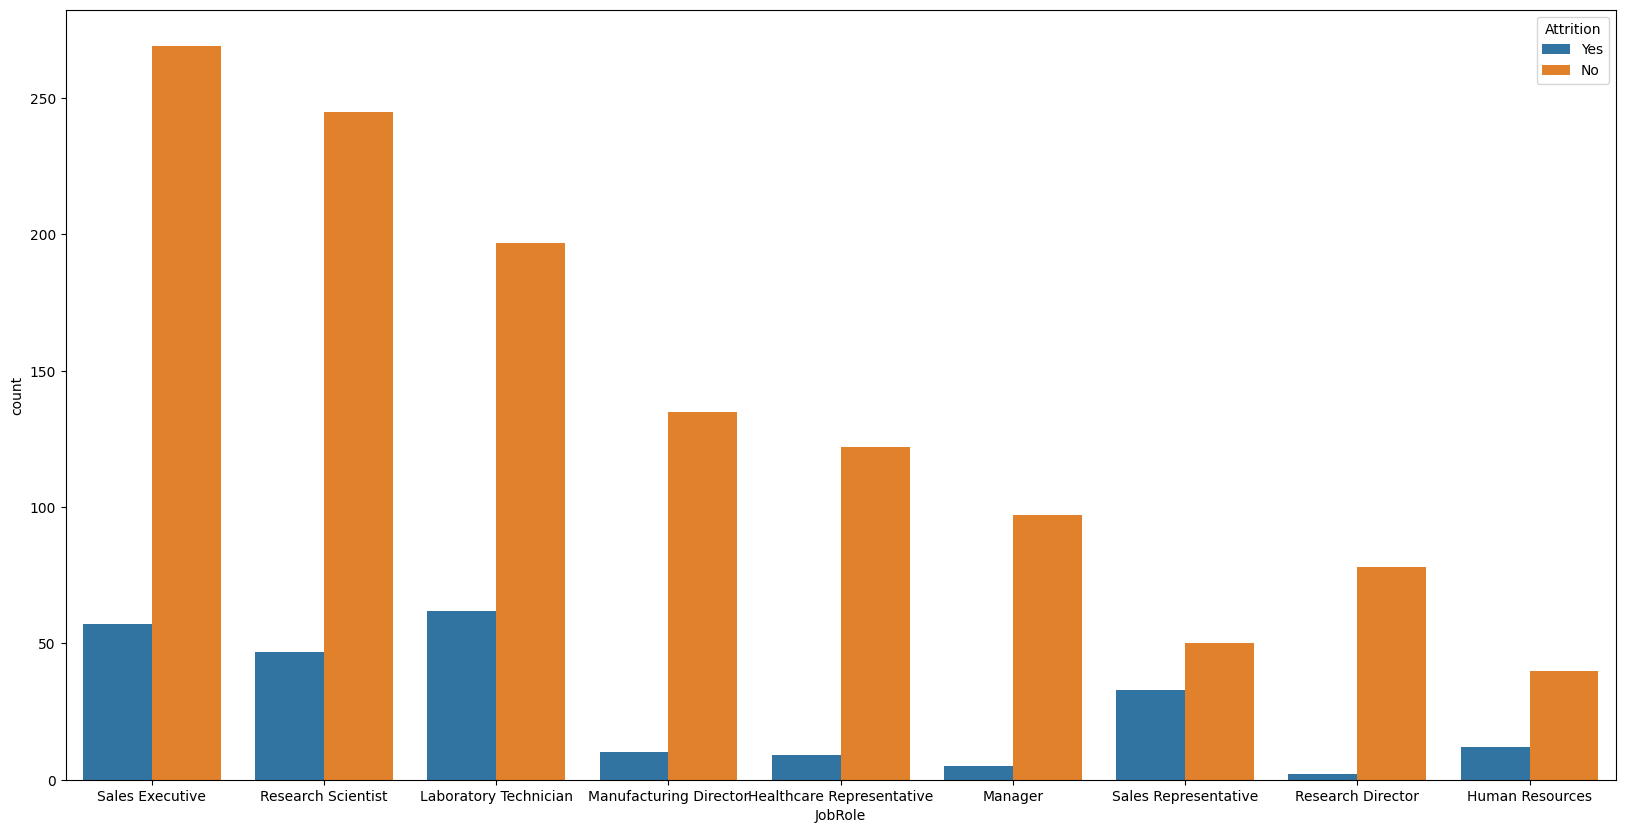

In [154]:
plt.figure(figsize=(20,10), facecolor='white')
sns.countplot(x='JobRole' , hue='Attrition', data=df)
plt.xlabel('JobRole' ,fontsize=10)

*  There are less no. of Research Director who leaves the company

*  Laboratory Techician , Sales Executive and Research Scientist are the top 3 job roles in which employees have thier Attrition"Yes"

*  Apart from these it can also seen that there are more number of employees in Sales Executive job role.

### ANALYSIS ON CONINUOS DATA W.R.T TARGET COLUMN

In [155]:
numerical_col = []
for column in df.columns:
    if df[column].dtype == "int64" and len(df[column].unique())>= 10:
        
        numerical_col.append(column)

In [156]:
numerical_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

#### GRAPHICAL REPRESENTATION OF CONTINUOS DATA

In [157]:
data = df[['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]

### ANOTHER METHOD OF VISUALIZATION

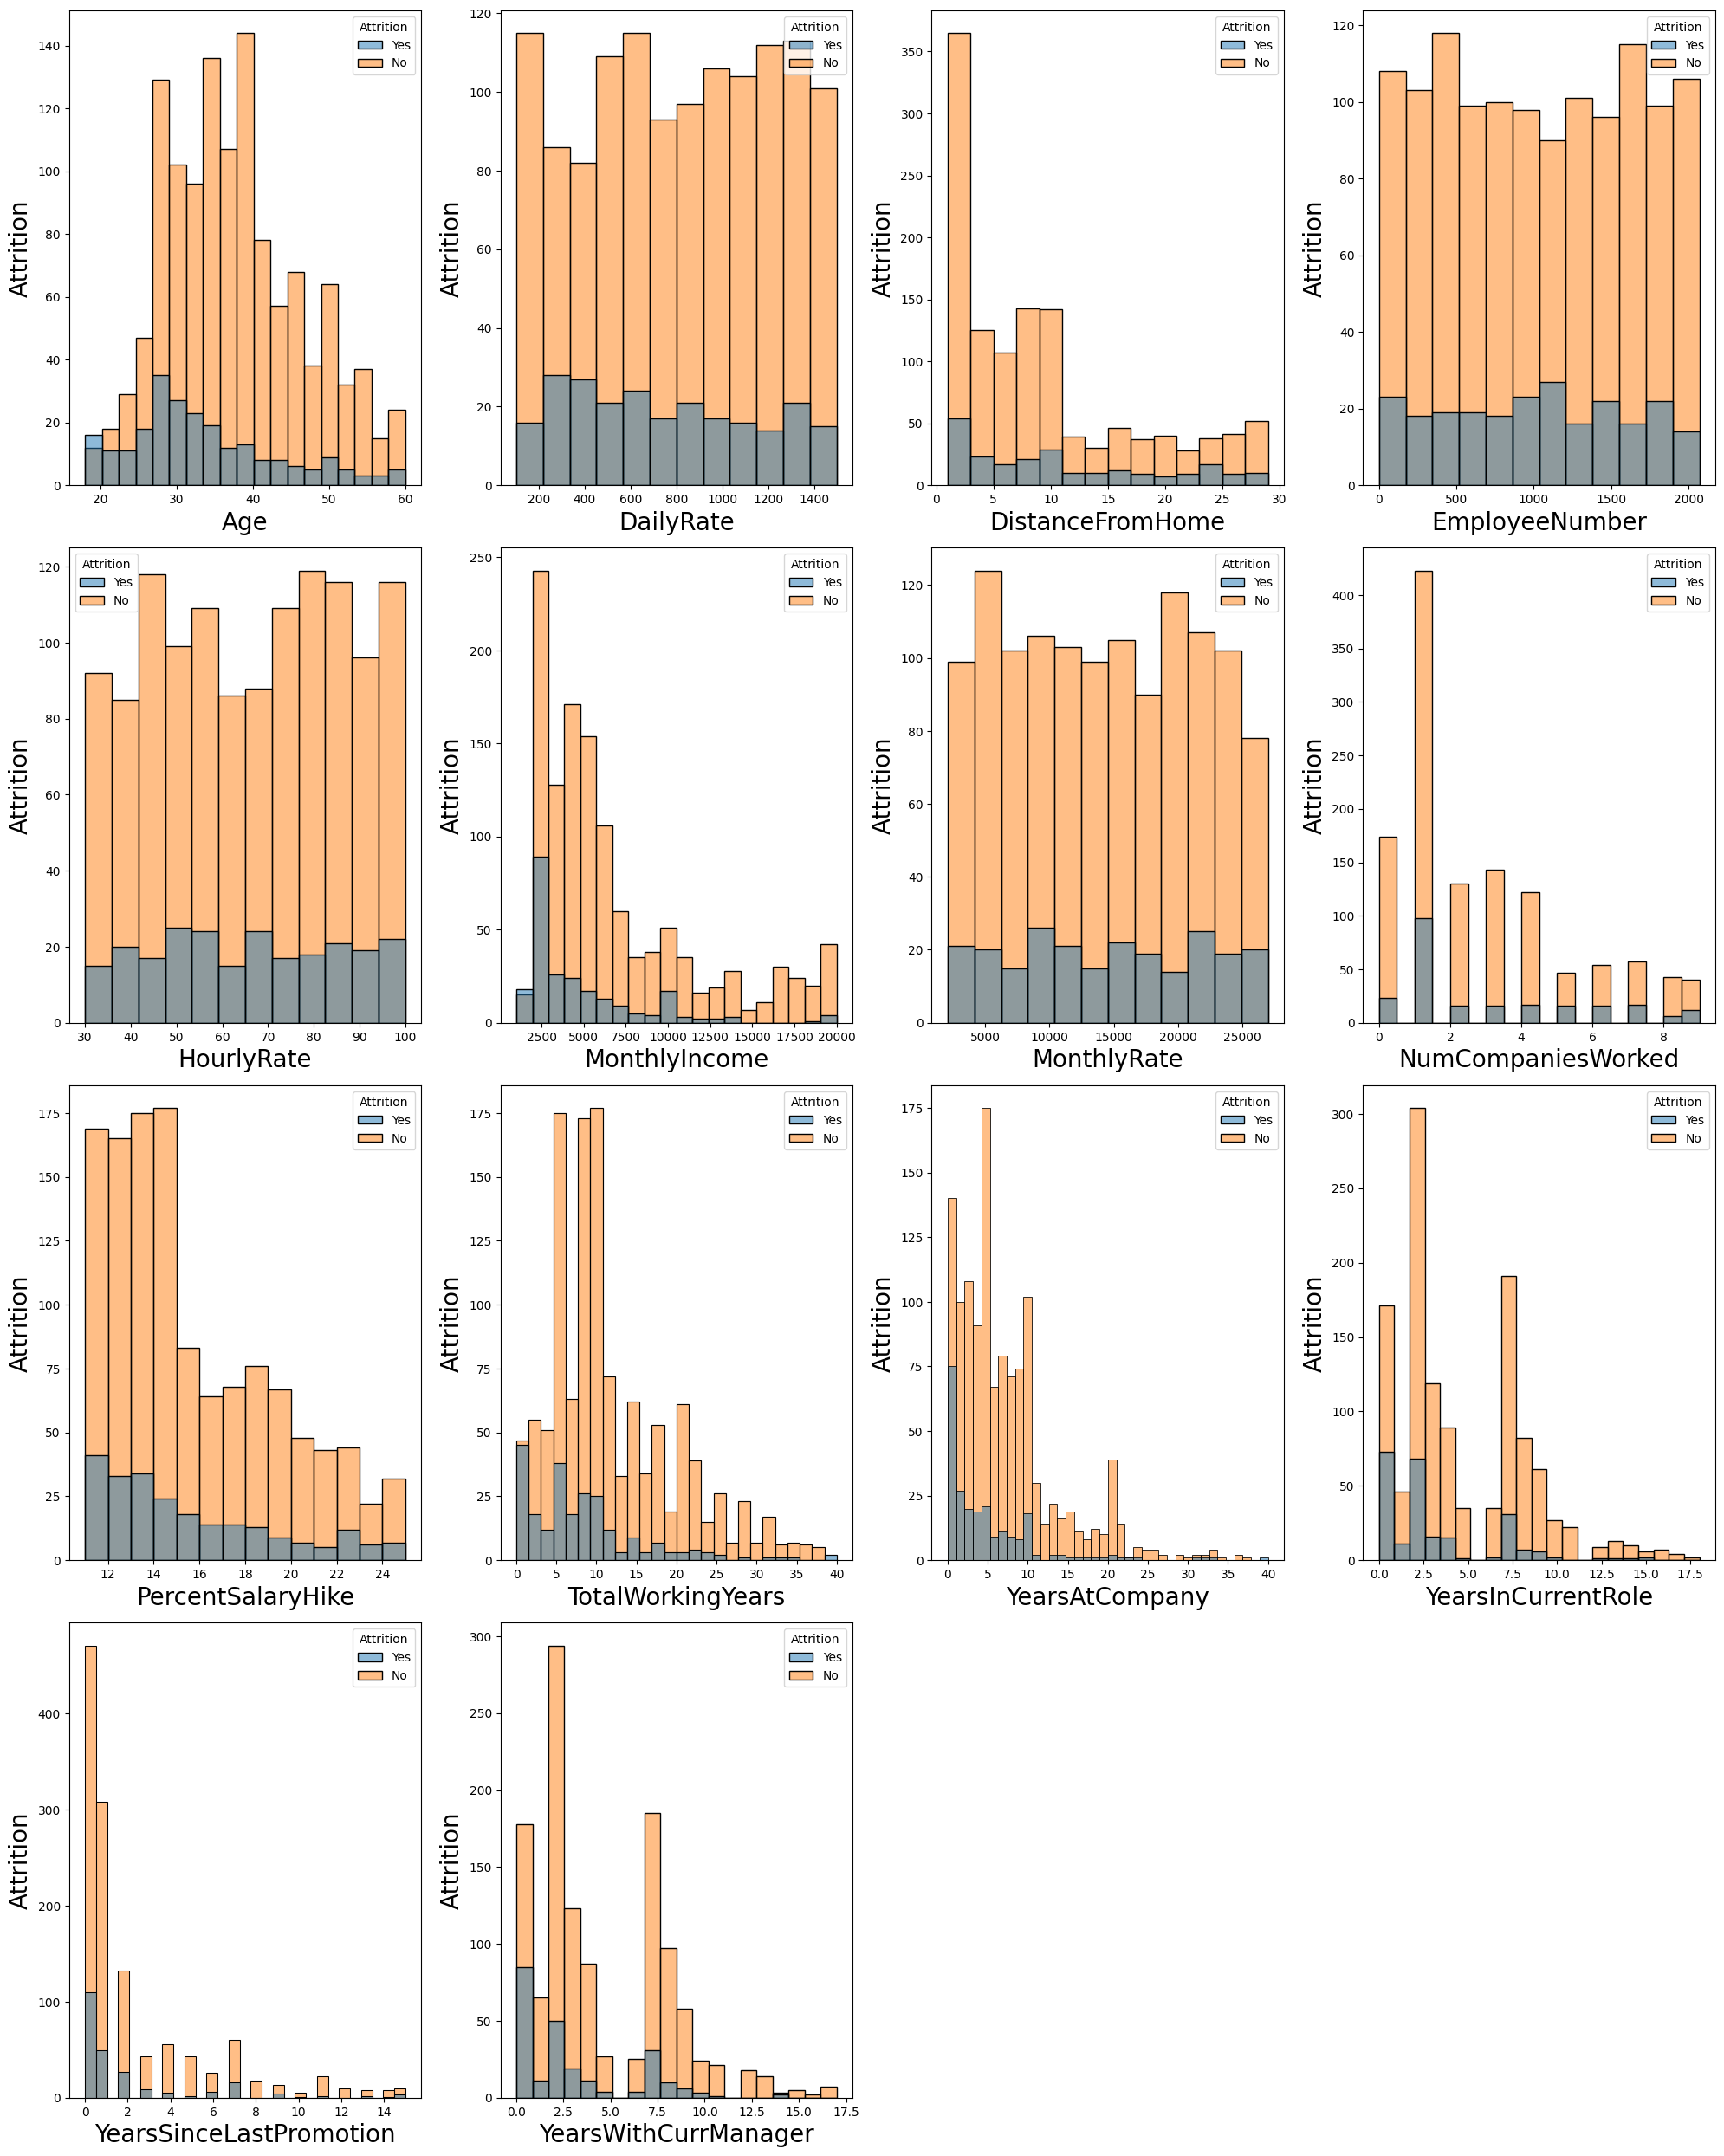

In [158]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 16:
        ax =plt.subplot(4,4,plotnumber)
        sns.histplot(x=data[column].dropna(axis=0)
                    , hue= df.Attrition)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Attrition', fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### 1- IMPACT OF AGE ON ATTRITION

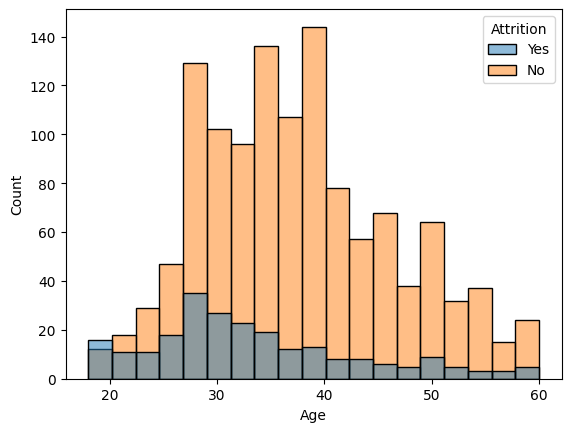

In [159]:
sns.histplot(hue=df.Attrition,x=df.Age)
plt.show()

*  Employees in age of 25 to 35 aremore likely to leave the job

*  After 40 age. the distribution tells us that "Higher the Age Lesser will be Attrition

#### DISTANCE FROM HOME AND ATTRITION

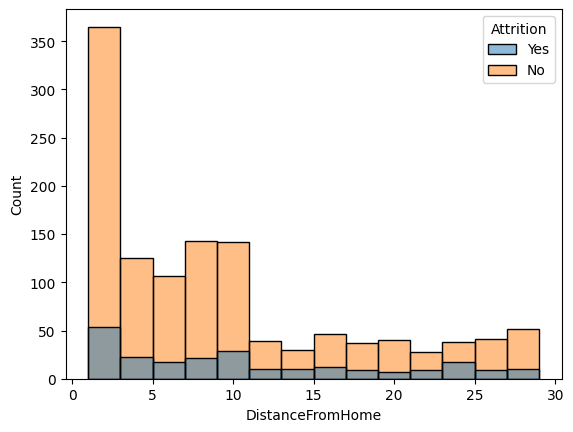

In [160]:
sns.histplot(hue=df.Attrition,x=df.DistanceFromHome)
plt.show()

*  Employees who has distance range of 0 - 10 km, are more likely to leave the job
*  we can also conclude that lesser the distance more number of employees are working

### 3- HOW MONTHLY INCOME GIVES TRENDS W.R.T ATTRITION

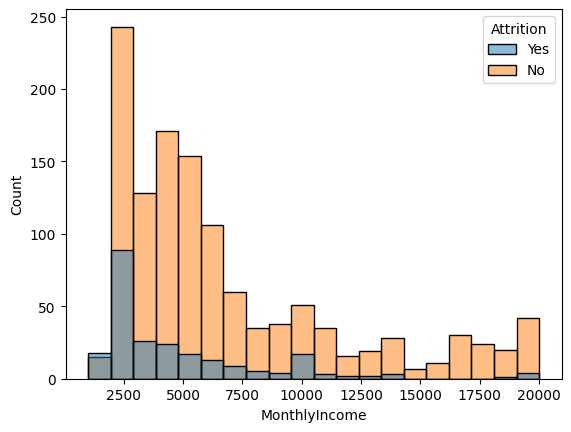

In [161]:
sns.histplot(x= df.MonthlyIncome, hue=df.Attrition)
plt.show()

*  Higher the Monthly Income give rise to less Attrition ( means Attrition "No")
*  Employees two have thier income aprox 2500 are more likely to quite thier job because 2500 is the least range of income

#### 4- IMPACT OF NO. OF COMPANIES WORKED

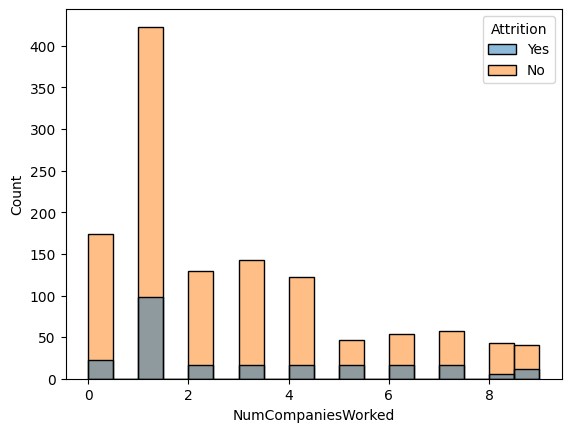

In [162]:
sns.histplot(hue=df.Attrition, x=df.NumCompaniesWorked)
plt.show()

*  Only that employees(no. of emp = 100) who worked with 1 company before have most Attrition (Attrition"Yes") rest have similiar data

#### 5- HOW SALARY HIKE IS IMPACTING THE ATTRITION

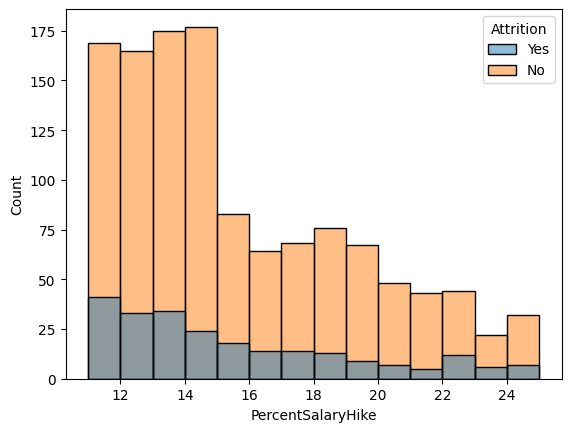

In [163]:
sns.histplot(hue=df.Attrition, x=df.PercentSalaryHike)
plt.show()

*  Higher the salary percentage hike lesser the Attrition("No")

#### 6- YEARS AT THE COMPANY

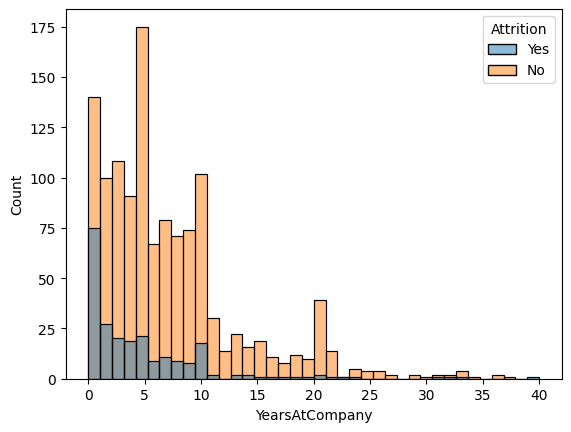

In [164]:
sns.histplot(hue=df.Attrition, x=df.YearsAtCompany)
plt.show()

*  Freshers have higher data of "Attrition Yes" that is of 75 no of workers or more than half of freshers
*  Apart from this employees who ranges from 1 to 10 year working on this company are also likely to quit thier job

### ANALYSIS OF DISTANCE DATA W.R.T TARGET COLUMN

In [165]:
discrete_col = []
for column in df .columns:
    if df[column].dtype == "int64" and len(df [column].unique()) <= 10:
        discrete_col.append(column)

In [166]:
data2 = df[['Education',
           'EmployeeCount',
           'EnvironmentSatisfaction',
           'JobInvolvement',
           'JobLevel',
           'JobSatisfaction',
           'NumCompaniesWorked',
           'PerformanceRating',
           'RelationshipSatisfaction',
           'StandardHours',
           'StockOptionLevel',
           'TrainingTimesLastYear',
           'WorkLifeBalance']]

### GRAPHICAL REPRESENTATION

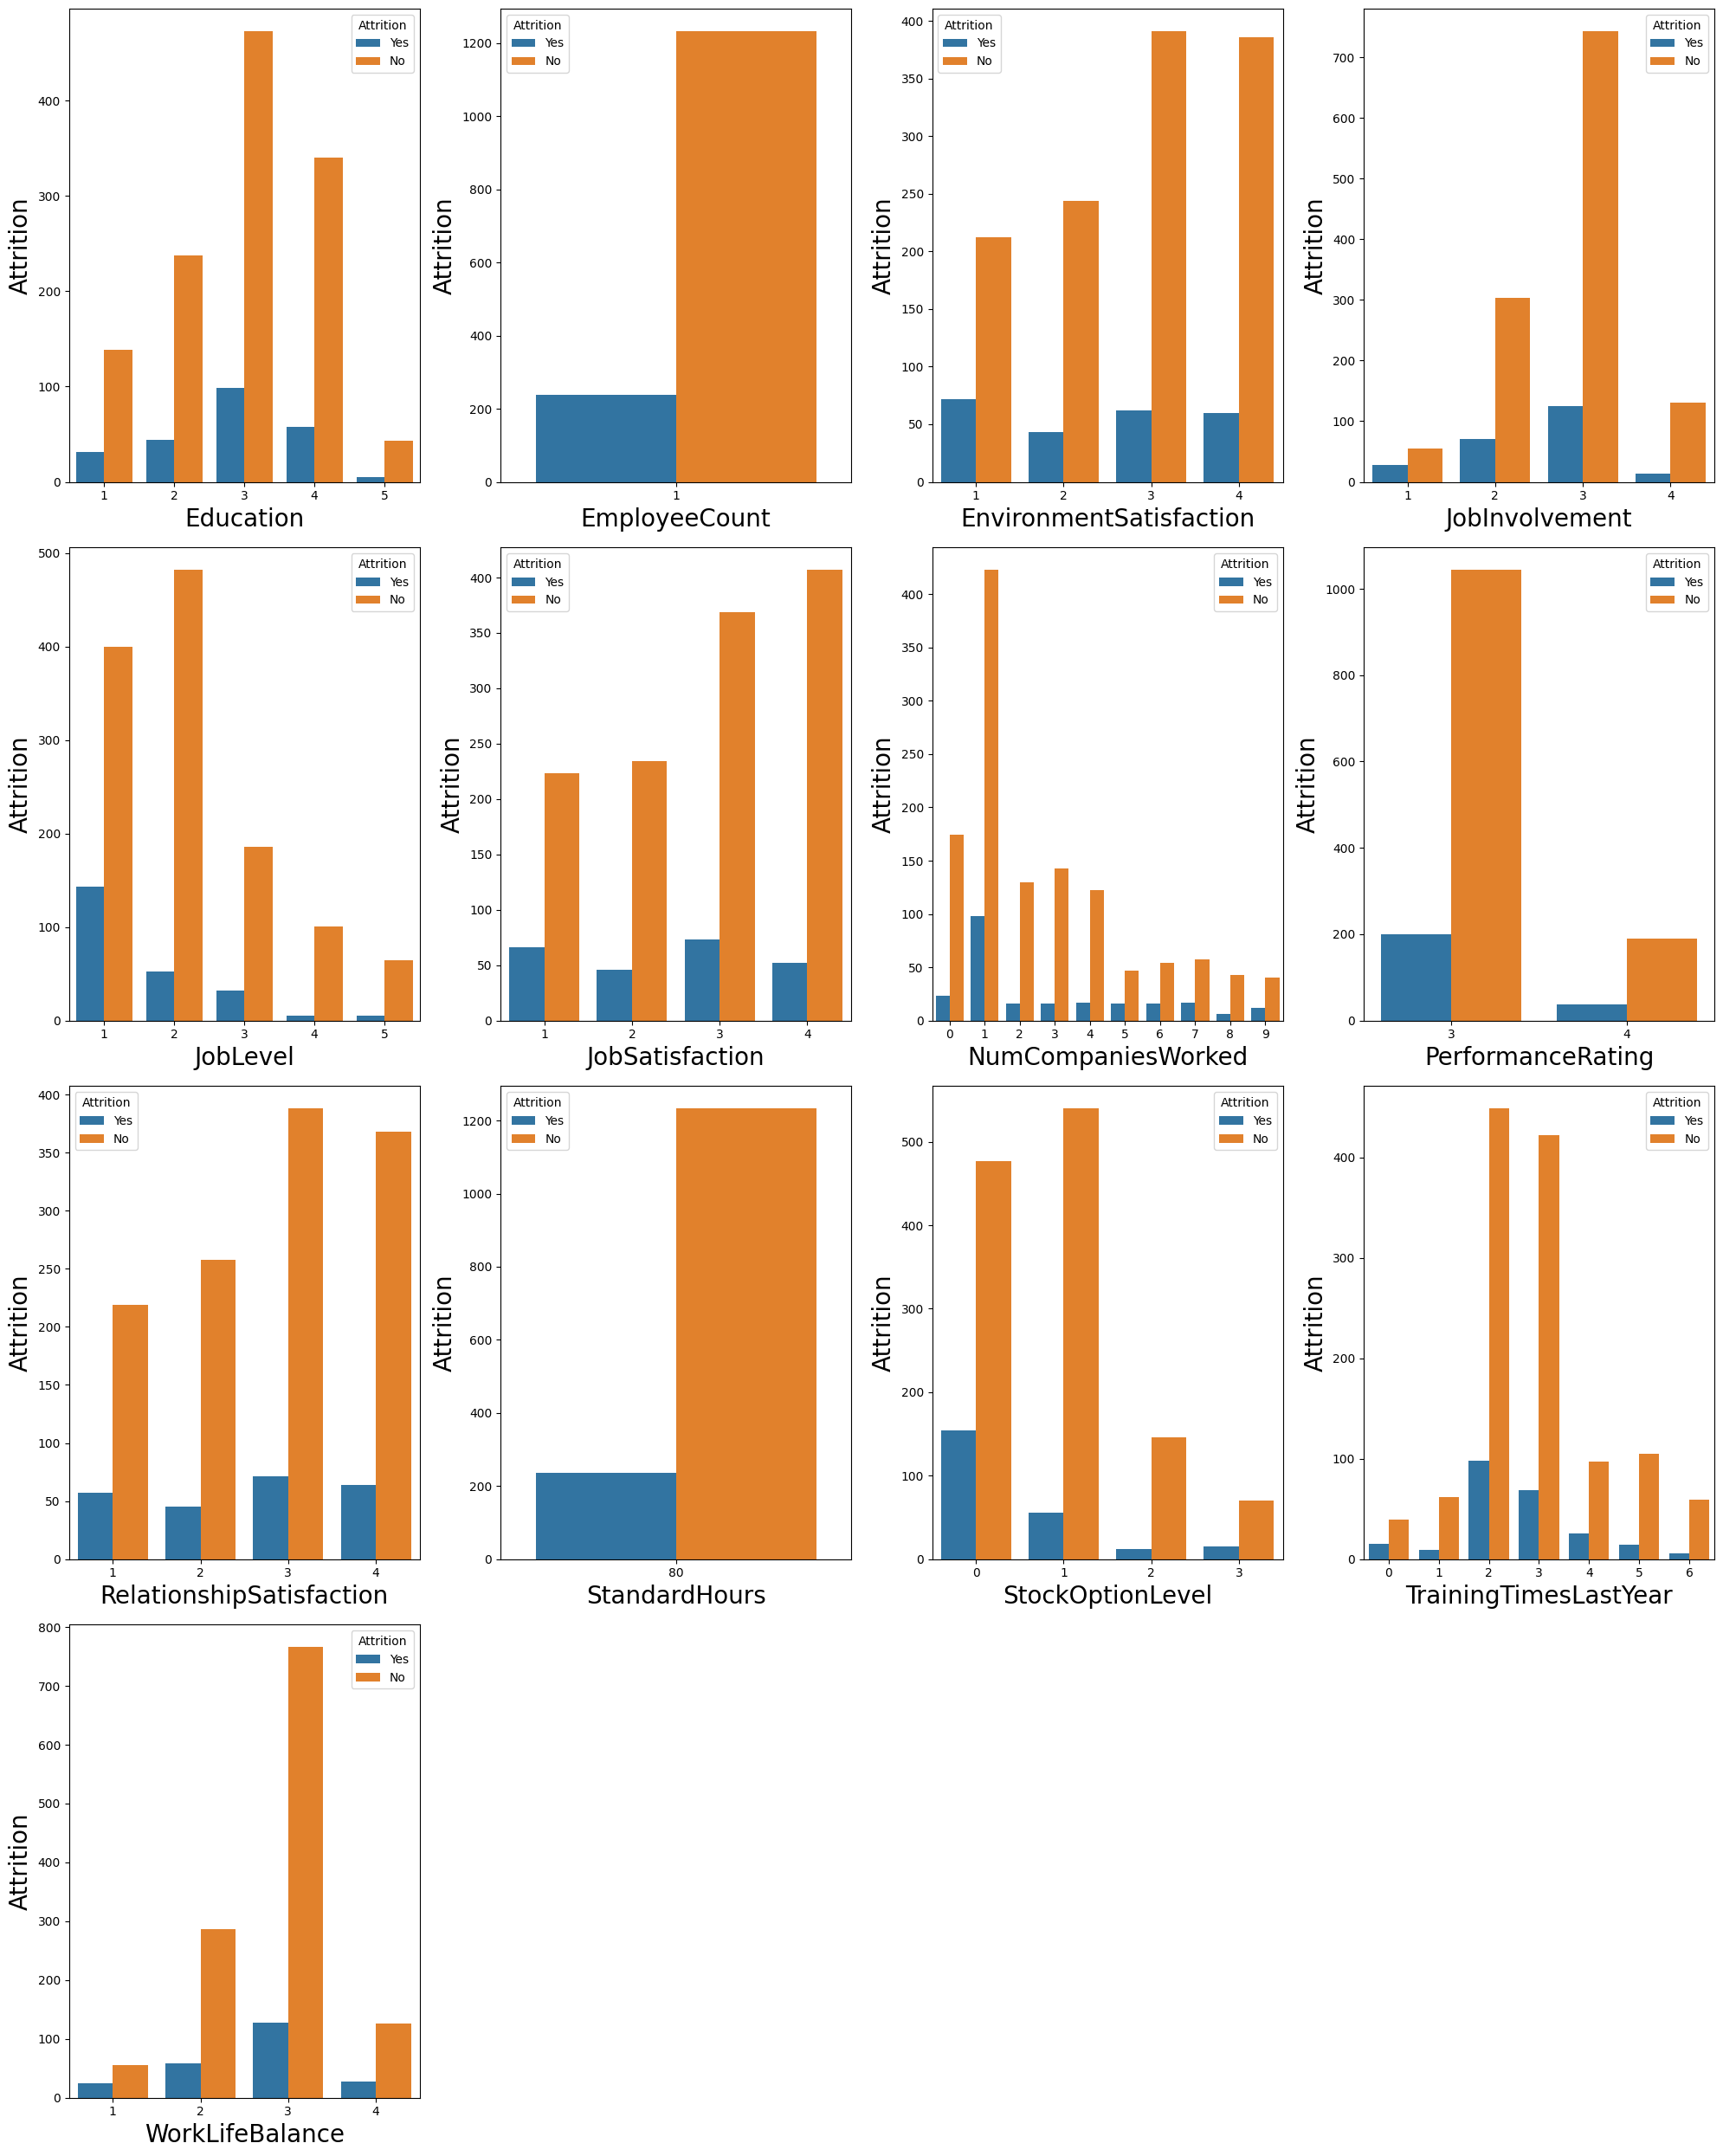

In [167]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data2[column].dropna(axis=0)
                     ,hue=df.Attrition)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Attrition', fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### 1- IMPACT OF EMVIRONMENT AND JOB SATISFACTION ON ATTRITION

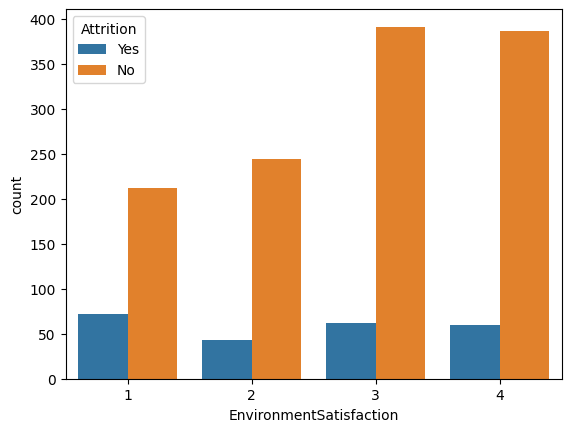

In [168]:
sns.countplot(hue=df.Attrition, x=df.EnvironmentSatisfaction)
plt.show()

* Increase in rate of Environment as well as job satisfaction gives rise to increase in Attrition "No"(means not willing to quit)

#### 2- HOW JOB LEVEL IS AFFECTING ATTRITION

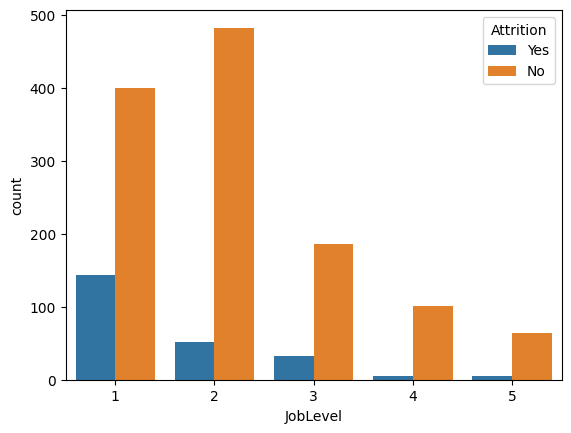

In [169]:
sns.countplot(hue=df.Attrition, x=df.JobLevel)
plt.show()

*  Increase in job level. decrease in chances of leaving the company for employees

#### 3- JOB INVOLVEMENT IMPACTING ON ATTRITION

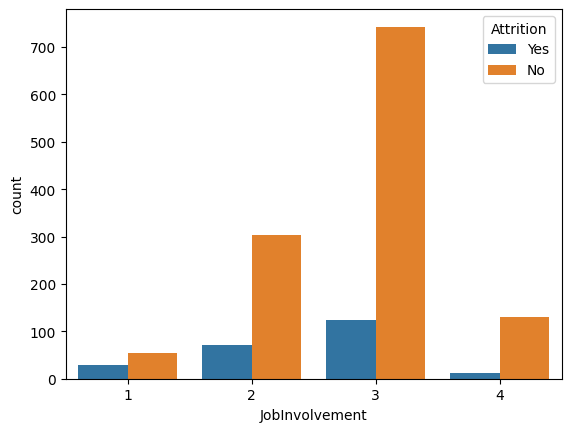

In [170]:
sns.countplot(hue=df.Attrition, x=df.JobInvolvement)
plt.show()

* The employees who involved in job more than sufficient are more likely to quit or we can say that they have more pressure of work

* Somehow, there are some emp. who are not involved fully in the job but still they are likely to quit

#### 4- IMPACT OF STOCK OPTIONLEVEL ON ATTRITION

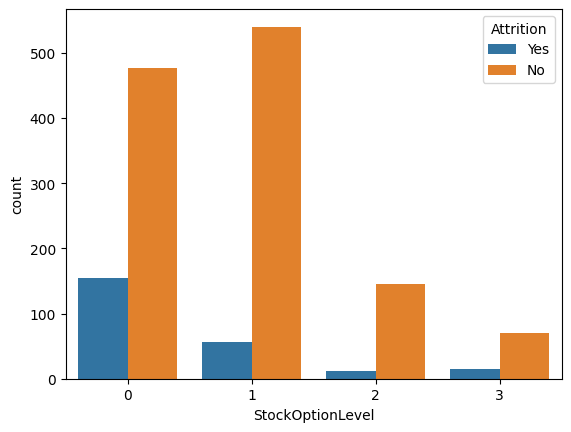

In [171]:
sns.countplot(hue=df.Attrition, x=df.StockOptionLevel)
plt.show()

*  For the employees who’re not having stock option are likely to quit

#### 5- PERFORMANCE RATING AND ATTRITION

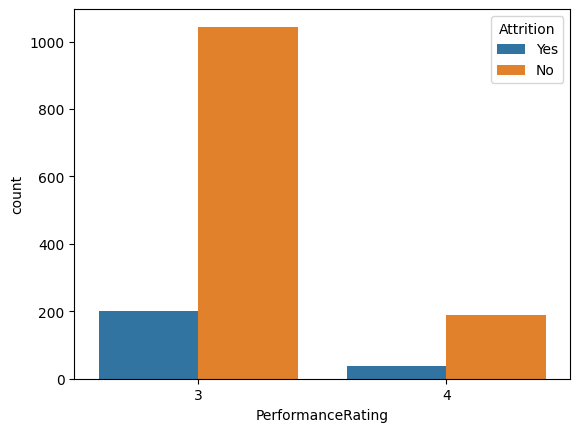

In [172]:
sns.countplot(hue=df.Attrition, x=df.PerformanceRating)
plt.show()

*  On an avarage. most of employees are moderately performance(because performance rating lies in 3-4)

* However employees having less performance rating are more likely to quit or we can say that company wants to fire that employees

# AVANTAGE OF DATA ANALYSIS

*  1. Make descions at the speed of your business

*  2. Increase business optimization

*  3. Quicly detect and address operational issuess

*  4. Improve customer service with up-to-data information

# DATA PRE-PROCESSING

In [173]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [174]:
unique_values = df['BusinessTravel'].unique()
unique_values

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

### CATAGORICAL DATA HANDLING 

In [175]:
df.Attrition = df.Attrition.map({'Yes':1, 'No':0})

In [176]:
df.BusinessTravel = df.BusinessTravel.map({'Travel_Frequently':1, 'Travel_Rarely':2, 'Non-Travel':0})

In [177]:
df.Department = df.Department.map({'Research & Development':2, 'Sales':1, 'Human Resources':0})

In [178]:
df.EducationField=df.EducationField.map({'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other':1,'Human Resources':0})

In [179]:
df.Gender=pd.get_dummies(df.Gender,drop_first=True)

In [180]:
df.JobRole=df.JobRole.map({'Laboratory Technician':8,'Sales Executive':7,'Research Scientist':6,'Sales Representative':5,
                          'Human Resources':4,'Manufacturing Director':3,'Healthcare Representative':2,'Manager':1,'Research Director':0})

In [181]:
df.MaritalStatus = df.MaritalStatus.map({'Single':2,'Married':1,'Divorced':0})

In [182]:
df.OverTime = df.OverTime.map({'Yes':1,'No':0})

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   bool  
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# FEATURE SELECTION

## DROPING UNIQUE ONES

In [184]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1, inplace=True)

# MODEL CREATION

In [185]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

## BALANCING THE TARGET COLUMN USING SMOTHE

In [186]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm= SMOTE()
print("unblanced data: ",Counter(y))
x_sm,y_sm= sm.fit_resample(x,y)
print("blanced data: ",Counter(y_sm))

unblanced data:  Counter({0: 1233, 1: 237})
blanced data:  Counter({1: 1233, 0: 1233})


## TRAIN-TEST-SPLIT

In [187]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm, random_state=42,test_size=0.25)

## MODEL BUILDING

In [188]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

# PREDICTION

In [189]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [190]:
from sklearn.metrics import classification_report,accuracy_score,f1_score

In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       311
           1       0.76      0.83      0.79       306

    accuracy                           0.79       617
   macro avg       0.79      0.79      0.79       617
weighted avg       0.79      0.79      0.79       617



## CHECKING DATA IS FULLY TRAIN OR NOT

In [193]:
train_pred=dt.predict(x_train)

In [194]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       922
           1       1.00      1.00      1.00       927

    accuracy                           1.00      1849
   macro avg       1.00      1.00      1.00      1849
weighted avg       1.00      1.00      1.00      1849



## RANDOM FOREST TECHINQUE

In [195]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
rfc = RandomForestClassifier(n_estimators=100)

In [197]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [198]:
y_prediction=rfc.predict(x_test)

In [199]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.89      0.95      0.91       311
           1       0.94      0.88      0.91       306

    accuracy                           0.91       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.91      0.91      0.91       617

